# Modelling different aspects of Trust

In [44]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plots(ols_model_robust):
    # Residuals from the model
    residuals = ols_model_robust.resid
 
    # Predicted values from the model
    fitted_values = ols_model_robust.fittedvalues

    # 1. Residuals vs. Fitted Plot
    plt.figure(figsize=(8, 6))
    sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
    plt.axhline(0, linestyle='--', color='gray', linewidth=1)
    plt.title('Residuals vs Fitted')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    # 2. Q-Q Plot
    sm.qqplot(residuals, line='45', fit=True)
    plt.title('Q-Q Plot of Residuals')
    plt.show()

    # 3. Histogram of Residuals
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, color='blue')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()


In [3]:
def vif(X_const):
    vif = pd.DataFrame()
    vif["Variable"] = X_const.columns
    vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
    print(vif)

# Germany only

In [64]:
df = pd.read_csv('data/wvs/wave7.csv')

# Define the list of countries to include
countries_to_keep = ['DEU']
# Filter the DataFrame
df = df[df['B_COUNTRY_ALPHA'].isin(countries_to_keep)].copy()

C:\Users\ekaba\AppData\Local\Temp\ipykernel_23328\597167731.py:1: DtypeWarning: Columns (582,583,584) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/wvs/wave7.csv')


In [65]:
trust = ['base_distrust_index', 'national_distrust_index', 'international_distrust_index']

correlation_matrix = df[trust].corr()
correlation_matrix

,base_distrust_index,national_distrust_index,international_distrust_index
base_distrust_index,1.000000,0.388035,0.314003
national_distrust_index,0.388035,1.000000,0.694035
international_distrust_index,0.314003,0.694035,1.000000


## Baseline distrust

In [66]:
X = df.loc[:, 'baseline_corruption':]
y = df['base_distrust_index']
#X[['national_distrust_index', 'international_distrust_index']] = df[['national_distrust_index', 'international_distrust_index']]

### Robust OLS

In [67]:
# Add a constant term to the model (for the intercept)
X_const = sm.add_constant(X)

# Fit OLS model with robust standard errors
ols_model_robust = sm.OLS(y, X_const).fit(cov_type='HC0')

# Print the regression results with robust standard errors
print(ols_model_robust.summary())

                             OLS Regression Results                            
Dep. Variable:     base_distrust_index   R-squared:                       0.265
Model:                             OLS   Adj. R-squared:                  0.248
Method:                  Least Squares   F-statistic:                     14.51
Date:                  Di, 21 Jan 2025   Prob (F-statistic):           6.21e-70
Time:                         15:44:10   Log-Likelihood:                 1175.8
No. Observations:                 1490   AIC:                            -2282.
Df Residuals:                     1455   BIC:                            -2096.
Df Model:                           34                                         
Covariance Type:                   HC0                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

In [69]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuals = ols_model_robust.resid


bp_test = het_breuschpagan(residuals, X_const)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 61.53561805945283, 'p-value': 0.002632297862366786, 'f-value': 1.843491872820319, 'f p-value': 0.002316006030655372}


In [8]:
vif(X_const)

                      Variable         VIF
0                        const  212.091176
1          baseline_corruption    1.425903
2             group_corruption    1.376187
3         migration_perception    1.352547
4           migration_positive    1.230198
5           migration_negative    1.252014
6                     pol_pref    1.150121
7                       gender    1.427024
8                          age    1.739399
9             mother_immigrant    2.531751
10            father_immigrant    3.066402
11                is_immigrant    3.134467
12     standard_parents_better    1.327795
13      standard_parents_worse    1.332898
14          baseline_happiness    1.553446
15                      health    1.390405
16                     freedom    1.241270
17       baseline_satisfaction    1.948135
18      financial_satisfaction    1.905437
19         hardships_questions    1.321545
20   security_actions_money_no    1.199023
21   security_actions_night_no    1.364753
22  securit

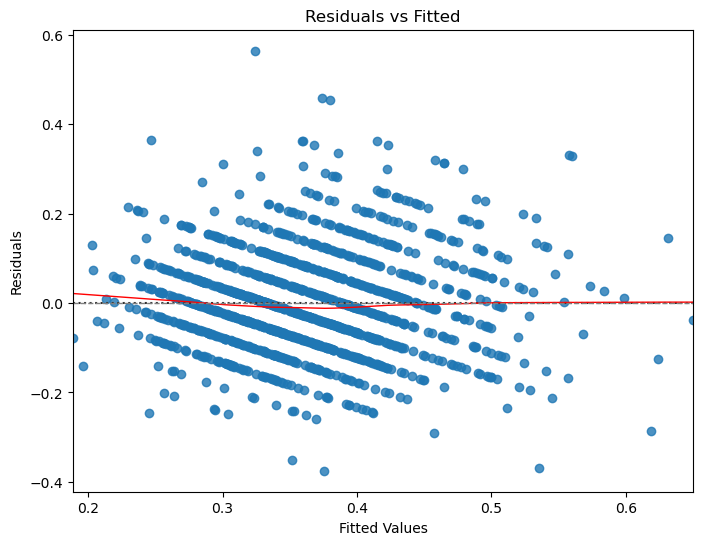

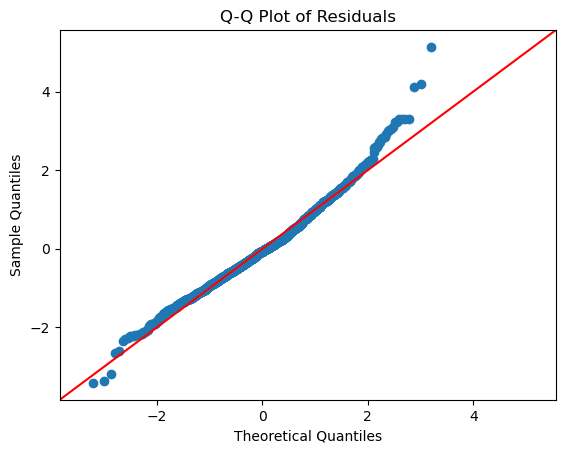

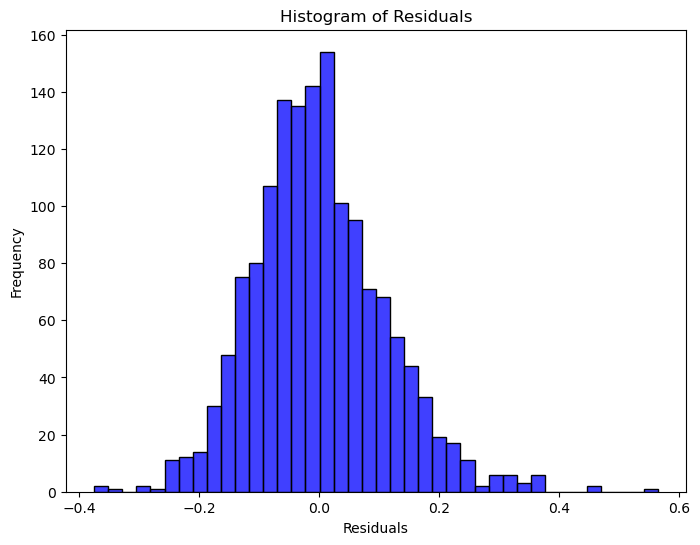

In [9]:
plots(ols_model_robust)

## National distrust

In [73]:
X = df.loc[:, 'baseline_corruption':]
y = df['national_distrust_index']
#X['base_distrust_index'] = df['base_distrust_index']

In [74]:
# Add a constant term to the model (for the intercept)
X_const = sm.add_constant(X)

# Fit OLS model with robust standard errors
ols_model_robust = sm.OLS(y, X_const).fit(cov_type='HC0')

# Print the regression results with robust standard errors
print(ols_model_robust.summary())

                               OLS Regression Results                              
Dep. Variable:     national_distrust_index   R-squared:                       0.339
Model:                                 OLS   Adj. R-squared:                  0.323
Method:                      Least Squares   F-statistic:                     19.76
Date:                      Di, 21 Jan 2025   Prob (F-statistic):           4.27e-96
Time:                             15:45:27   Log-Likelihood:                 1254.6
No. Observations:                     1490   AIC:                            -2439.
Df Residuals:                         1455   BIC:                            -2253.
Df Model:                               34                                         
Covariance Type:                       HC0                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

In [61]:
from statsmodels.stats.stattools import durbin_watson

residuals = ols_model_robust.resid

dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 1.9590370047411318


In [76]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, X_const)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 61.53561805945283, 'p-value': 0.002632297862366786, 'f-value': 1.843491872820319, 'f p-value': 0.002316006030655372}


In [12]:
vif(X_const)

                      Variable         VIF
0                        const  212.091176
1          baseline_corruption    1.425903
2             group_corruption    1.376187
3         migration_perception    1.352547
4           migration_positive    1.230198
5           migration_negative    1.252014
6                     pol_pref    1.150121
7                       gender    1.427024
8                          age    1.739399
9             mother_immigrant    2.531751
10            father_immigrant    3.066402
11                is_immigrant    3.134467
12     standard_parents_better    1.327795
13      standard_parents_worse    1.332898
14          baseline_happiness    1.553446
15                      health    1.390405
16                     freedom    1.241270
17       baseline_satisfaction    1.948135
18      financial_satisfaction    1.905437
19         hardships_questions    1.321545
20   security_actions_money_no    1.199023
21   security_actions_night_no    1.364753
22  securit

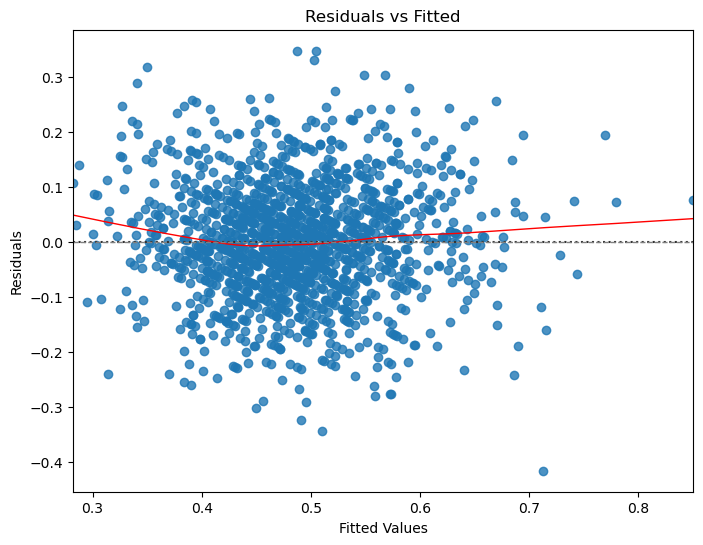

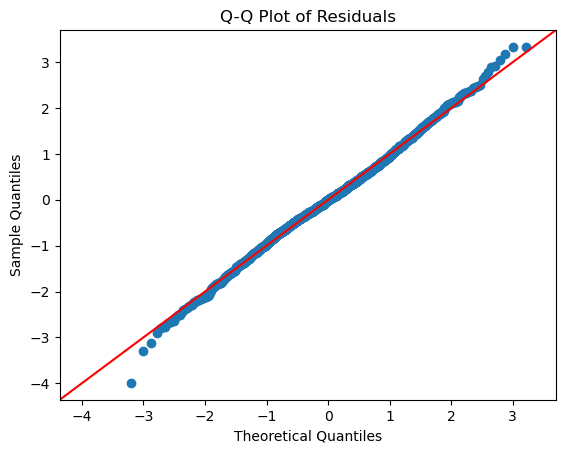

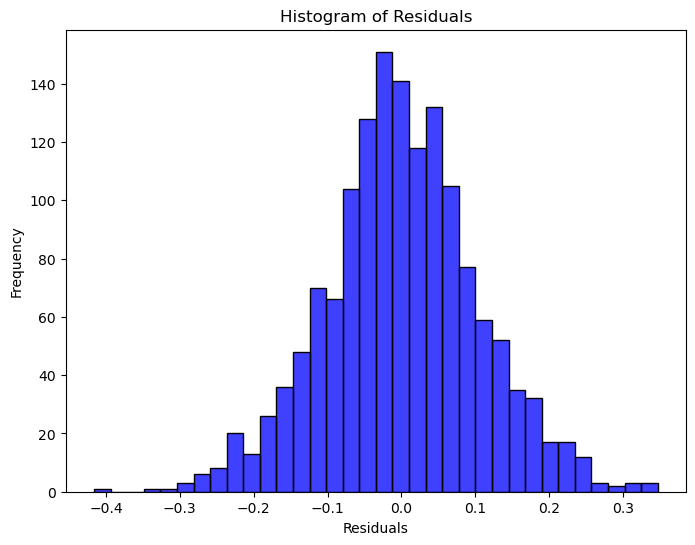

In [75]:
plots(ols_model_robust)

## International distrust

In [14]:
X = df.loc[:, 'baseline_corruption':]
y = df['international_distrust_index']
#X['base_distrust_index'] = df['base_distrust_index']

In [15]:
# Add a constant term to the model (for the intercept)
X_const = sm.add_constant(X)

# Fit OLS model with robust standard errors
ols_model_robust = sm.OLS(y, X_const).fit(cov_type='HC0')

# Print the regression results with robust standard errors
print(ols_model_robust.summary())

                                 OLS Regression Results                                 
Dep. Variable:     international_distrust_index   R-squared:                       0.225
Model:                                      OLS   Adj. R-squared:                  0.207
Method:                           Least Squares   F-statistic:                     10.79
Date:                          Tue, 21 Jan 2025   Prob (F-statistic):           2.71e-50
Time:                                  12:48:08   Log-Likelihood:                 781.38
No. Observations:                          1490   AIC:                            -1493.
Df Residuals:                              1455   BIC:                            -1307.
Df Model:                                    34                                         
Covariance Type:                            HC0                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------

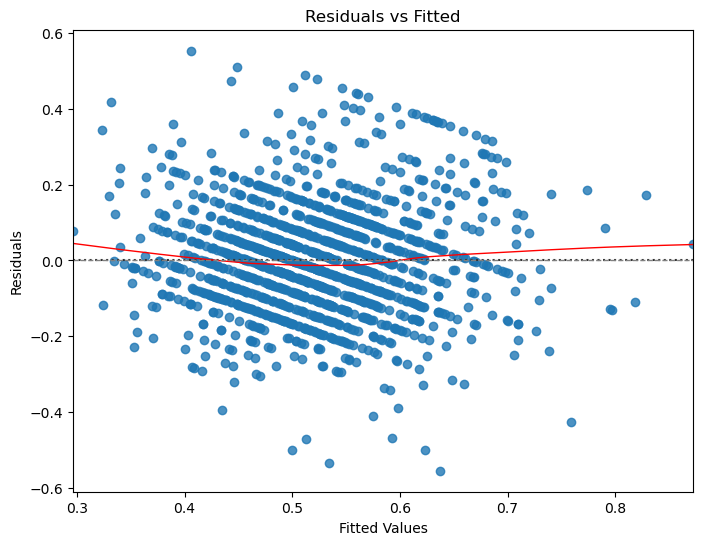

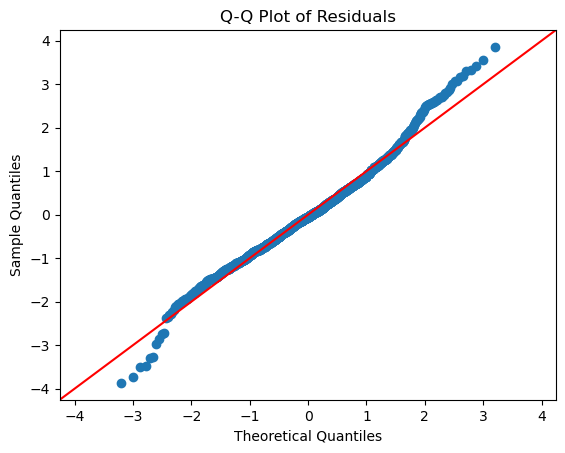

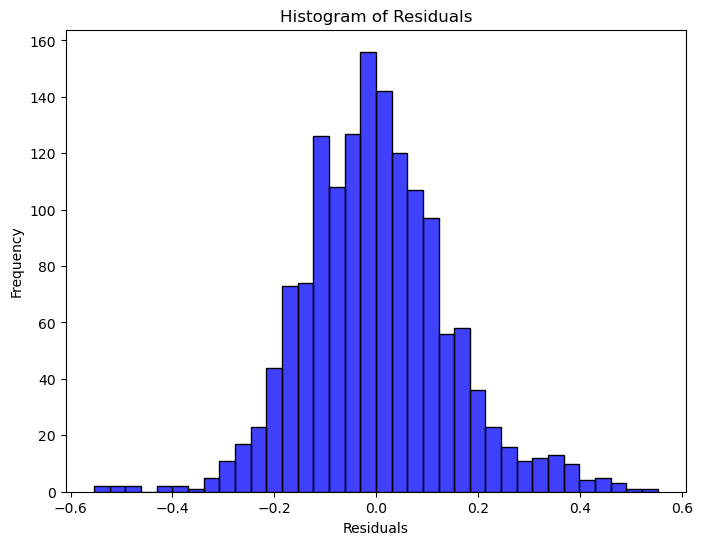

In [16]:
plots(ols_model_robust)

# Now add country dummies

In [45]:
df = pd.read_csv('data/wvs/wave7.csv')

# Define the list of countries to include
countries_to_keep = ['AUS','CAN','DEU','NLD','USA']
# Filter the DataFrame
df = df[df['B_COUNTRY_ALPHA'].isin(countries_to_keep)].copy()

C:\Users\ekaba\AppData\Local\Temp\ipykernel_23328\1574816901.py:1: DtypeWarning: Columns (582,583,584) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/wvs/wave7.csv')


In [46]:
dummies = pd.get_dummies(df['B_COUNTRY_ALPHA'], prefix='country').astype(int)
df = pd.concat([df, dummies], axis=1)
df = df.drop(['country_DEU'], axis=1)

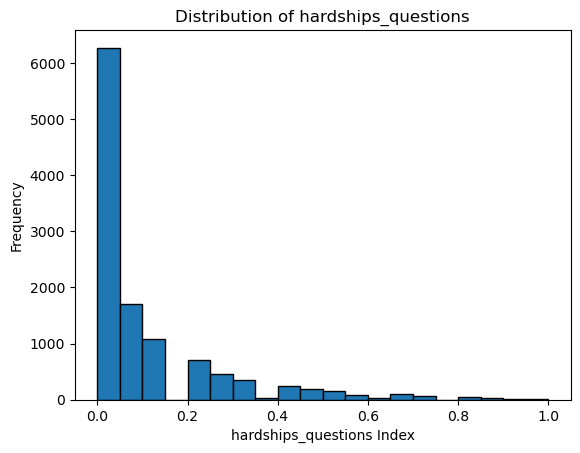

In [49]:
plt.hist(df['hardships_questions'], bins=20, edgecolor='black')
plt.title('Distribution of hardships_questions')
plt.xlabel('hardships_questions Index')
plt.ylabel('Frequency')
plt.show()

In [48]:
df['hardships_questions'].value_counts()

hardships_questions
0.000000    6278
0.066667    1700
0.133333    1074
0.200000     698
0.333333     356
0.266667     248
0.400000     237
0.266667     209
0.466667     150
0.533333     132
0.666667     102
0.600000      81
0.733333      51
0.466667      38
0.800000      28
0.600000      27
0.533333      24
0.866667      20
0.400000      20
0.800000      10
1.000000       8
0.933333       6
0.666667       5
0.733333       4
0.866667       4
0.733333       2
Name: count, dtype: int64

## Baseline Trust

In [19]:
X = df.loc[:, 'baseline_corruption':]
y = df['base_distrust_index']

In [20]:
# Add a constant term to the model (for the intercept)
X_const = sm.add_constant(X)

# Fit OLS model with robust standard errors
ols_model_robust = sm.OLS(y, X_const).fit(cov_type='HC0')

# Print the regression results with robust standard errors
print(ols_model_robust.summary())

                             OLS Regression Results                            
Dep. Variable:     base_distrust_index   R-squared:                       0.309
Model:                             OLS   Adj. R-squared:                  0.307
Method:                  Least Squares   F-statistic:                     117.1
Date:                 Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                         12:48:10   Log-Likelihood:                 7964.1
No. Observations:                11512   AIC:                        -1.585e+04
Df Residuals:                    11473   BIC:                        -1.556e+04
Df Model:                           38                                         
Covariance Type:                   HC0                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

In [21]:
vif(X_const)

                      Variable         VIF
0                        const  146.808569
1          baseline_corruption    1.452427
2             group_corruption    1.324739
3         migration_perception    1.449763
4           migration_positive    1.425862
5           migration_negative    2.550300
6                     pol_pref    1.201273
7                       gender    1.283385
8                          age    1.584664
9             mother_immigrant    1.635429
10            father_immigrant    2.748770
11                is_immigrant    2.729616
12     standard_parents_better    1.359834
13      standard_parents_worse    1.447531
14          baseline_happiness    1.735640
15                      health    1.436430
16                     freedom    1.537951
17       baseline_satisfaction    2.484654
18      financial_satisfaction    2.074762
19         hardships_questions    1.704850
20   security_actions_money_no    1.221247
21   security_actions_night_no    1.362248
22  securit

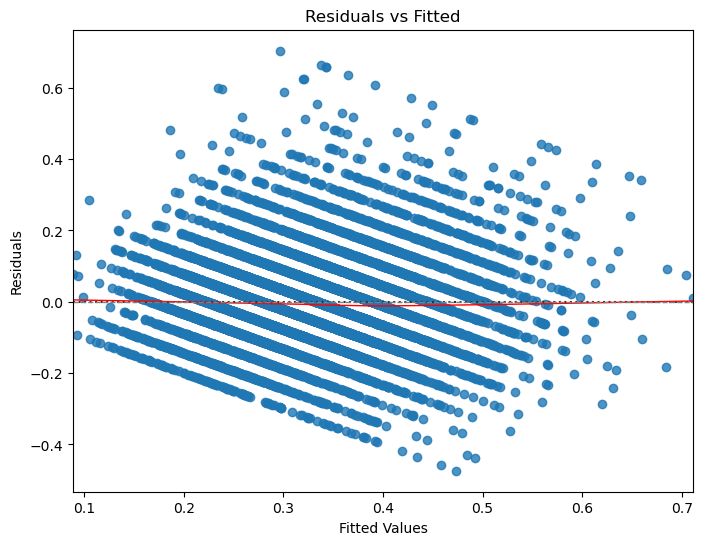

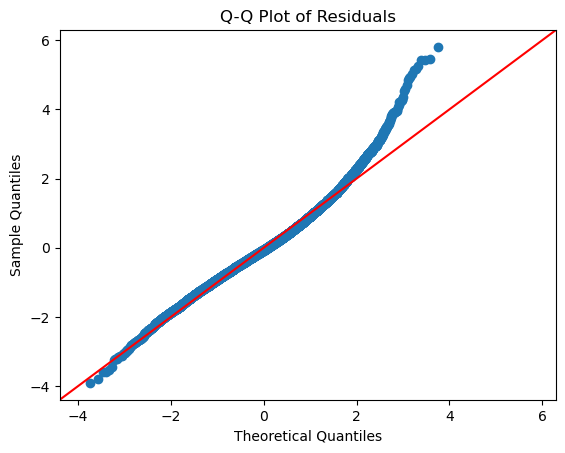

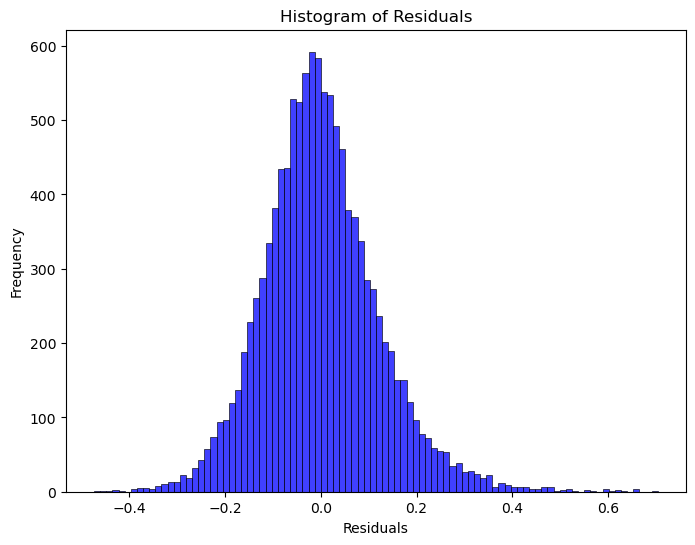

In [22]:
plots(ols_model_robust)

## National distrust

In [23]:
X = df.loc[:, 'baseline_corruption':]
y = df['national_distrust_index']

In [24]:
# Add a constant term to the model (for the intercept)
X_const = sm.add_constant(X)

# Fit OLS model with robust standard errors
ols_model_robust = sm.OLS(y, X_const).fit(cov_type='HC0')

# Print the regression results with robust standard errors
print(ols_model_robust.summary())

                               OLS Regression Results                              
Dep. Variable:     national_distrust_index   R-squared:                       0.331
Model:                                 OLS   Adj. R-squared:                  0.329
Method:                      Least Squares   F-statistic:                     137.3
Date:                     Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                             12:48:32   Log-Likelihood:                 8158.3
No. Observations:                    11512   AIC:                        -1.624e+04
Df Residuals:                        11473   BIC:                        -1.595e+04
Df Model:                               38                                         
Covariance Type:                       HC0                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

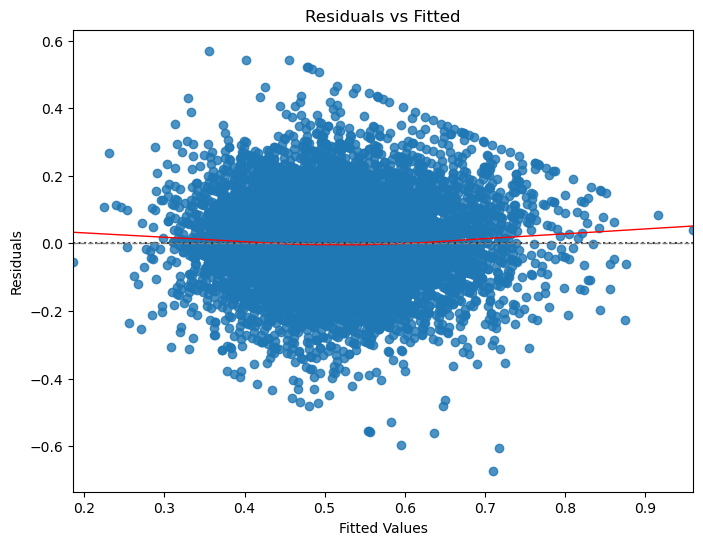

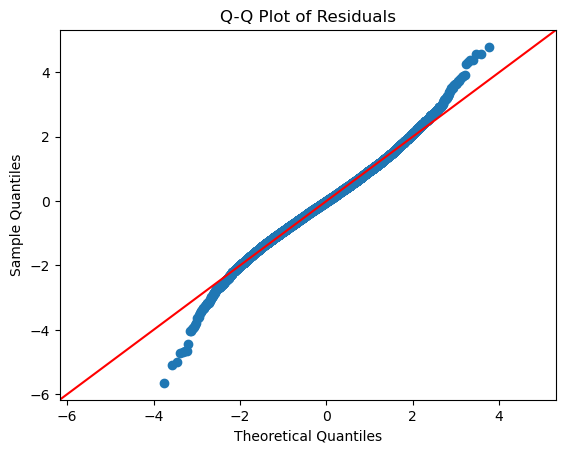

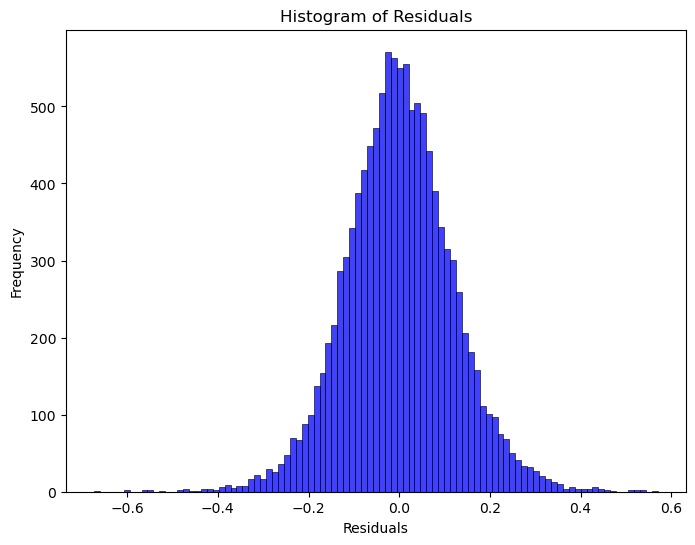

In [25]:
plots(ols_model_robust)

## International distrust

In [26]:
X = df.loc[:, 'baseline_corruption':]
y = df['international_distrust_index']

In [27]:
# Add a constant term to the model (for the intercept)
X_const = sm.add_constant(X)

# Fit OLS model with robust standard errors
ols_model_robust = sm.OLS(y, X_const).fit(cov_type='HC0')

# Print the regression results with robust standard errors
print(ols_model_robust.summary())

                                 OLS Regression Results                                 
Dep. Variable:     international_distrust_index   R-squared:                       0.263
Model:                                      OLS   Adj. R-squared:                  0.260
Method:                           Least Squares   F-statistic:                     103.9
Date:                          Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                                  12:48:53   Log-Likelihood:                 4431.4
No. Observations:                         11512   AIC:                            -8785.
Df Residuals:                             11473   BIC:                            -8498.
Df Model:                                    38                                         
Covariance Type:                            HC0                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------

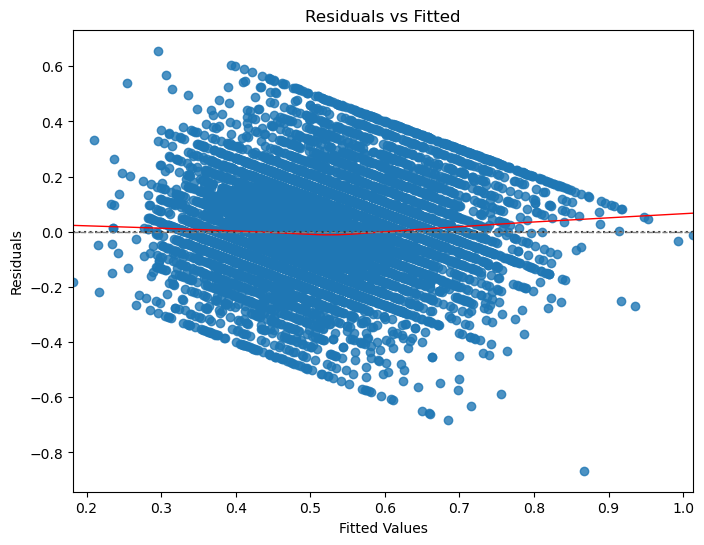

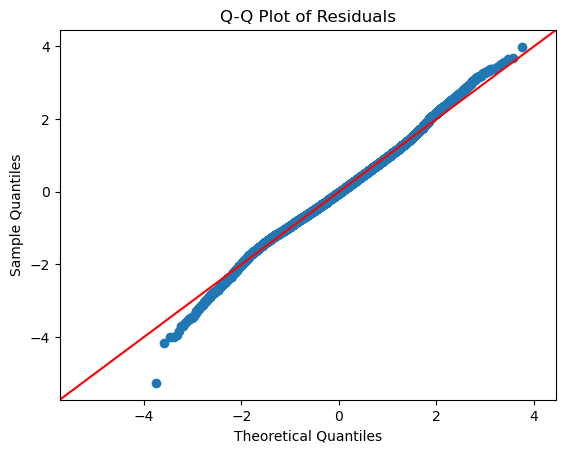

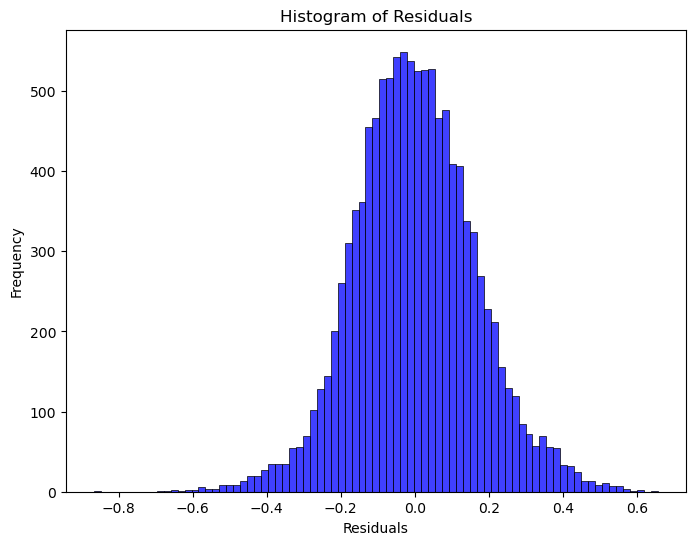

In [28]:
plots(ols_model_robust)

# WPFI Rank

In [51]:
df = pd.read_csv('data/wvs/wave7.csv')

# Define the list of countries to include
countries_to_keep = ['AUS','CAN','DEU','NLD','USA']
# Filter the DataFrame
df = df[df['B_COUNTRY_ALPHA'].isin(countries_to_keep)].copy()

C:\Users\ekaba\AppData\Local\Temp\ipykernel_23328\1574816901.py:1: DtypeWarning: Columns (582,583,584) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/wvs/wave7.csv')


## Baseline 

In [52]:
X = df.loc[:, 'baseline_corruption':]
X['wpfi_rank'] = df['wpfi_rank']
y = df['base_distrust_index']

In [31]:
# Add a constant term to the model (for the intercept)
X_const = sm.add_constant(X)

# Fit OLS model with robust standard errors
ols_model_robust = sm.OLS(y, X_const).fit(cov_type='HC0')

# Print the regression results with robust standard errors
print(ols_model_robust.summary())

                             OLS Regression Results                            
Dep. Variable:     base_distrust_index   R-squared:                       0.273
Model:                             OLS   Adj. R-squared:                  0.271
Method:                  Least Squares   F-statistic:                     104.0
Date:                 Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                         12:49:16   Log-Likelihood:                 7672.9
No. Observations:                11512   AIC:                        -1.527e+04
Df Residuals:                    11476   BIC:                        -1.501e+04
Df Model:                           35                                         
Covariance Type:                   HC0                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

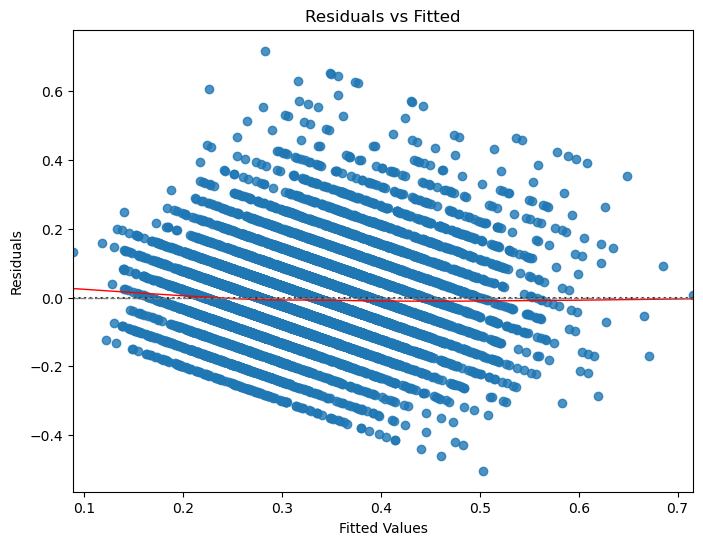

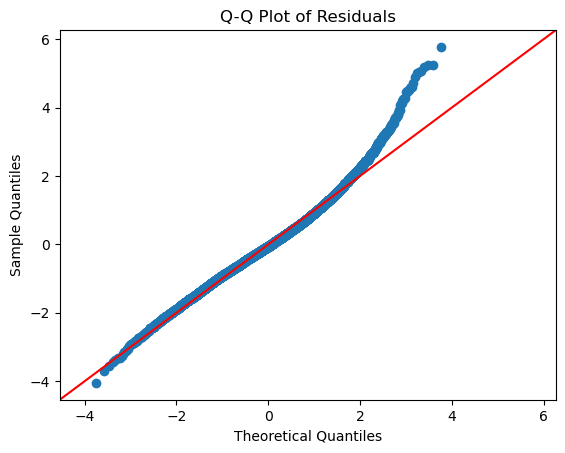

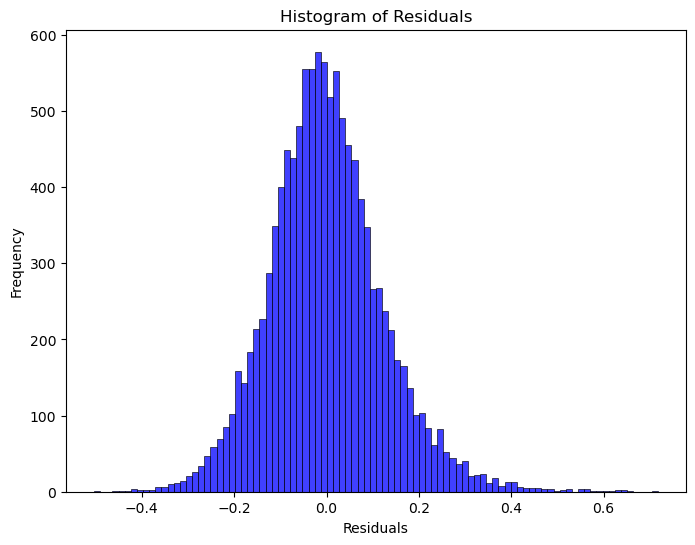

In [32]:
plots(ols_model_robust)

## National

In [50]:
df.wpfi_rank.value_counts()

wpfi_rank
16.0    4018
43.0    2342
28.0    1929
19.0    1733
15.0    1490
Name: count, dtype: int64

In [ ]:
df

In [56]:
X = df.loc[:, 'baseline_corruption':]
y = df['national_distrust_index']
X['wpfi_rank'] = df['wpfi_rank']*0.01


In [57]:
# Add a constant term to the model (for the intercept)
X_const = sm.add_constant(X)

# Fit OLS model with robust standard errors
ols_model_robust = sm.OLS(y, X_const).fit(cov_type='HC0')

# Print the regression results with robust standard errors
print(ols_model_robust.summary())

                               OLS Regression Results                              
Dep. Variable:     national_distrust_index   R-squared:                       0.327
Model:                                 OLS   Adj. R-squared:                  0.325
Method:                      Least Squares   F-statistic:                     145.8
Date:                      Di, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                             14:43:26   Log-Likelihood:                 8122.2
No. Observations:                    11512   AIC:                        -1.617e+04
Df Residuals:                        11476   BIC:                        -1.591e+04
Df Model:                               35                                         
Covariance Type:                       HC0                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

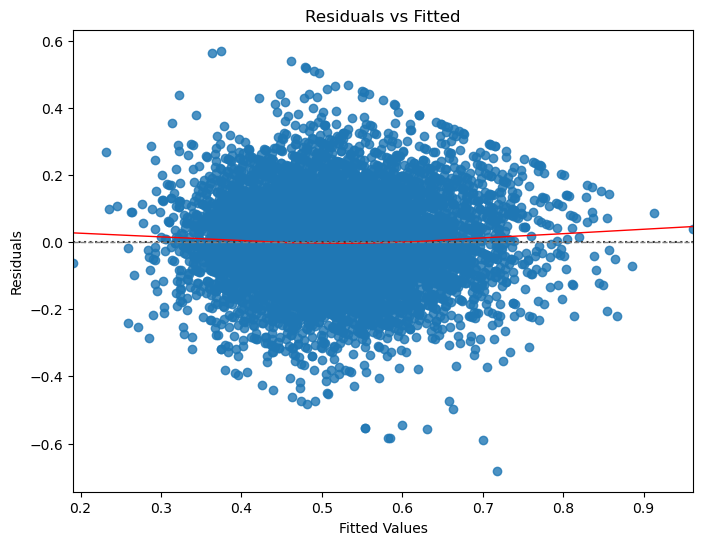

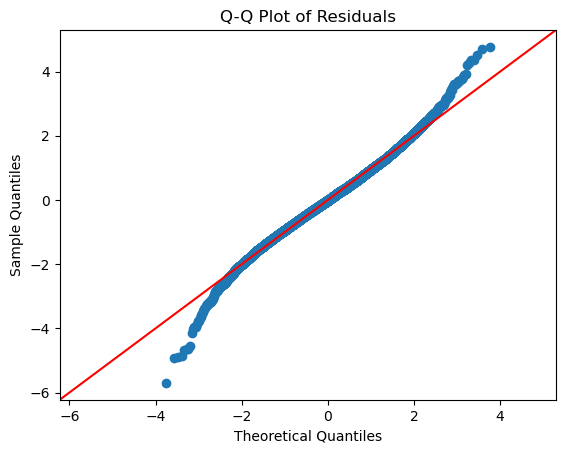

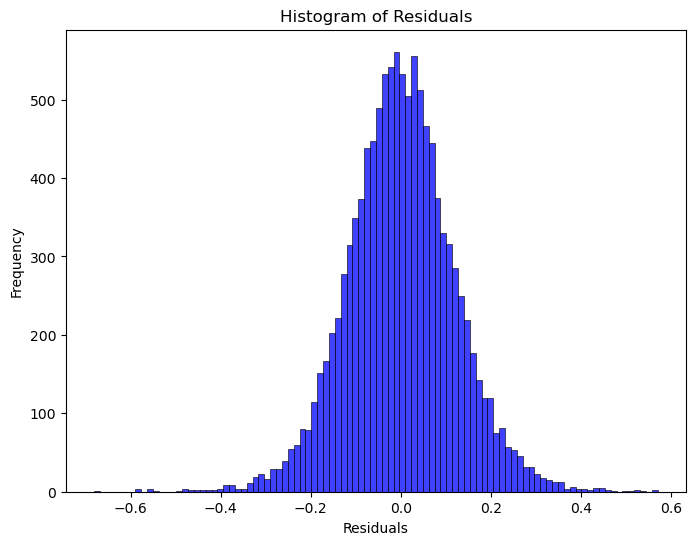

In [55]:
plots(ols_model_robust)

## International

In [36]:
X = df.loc[:, 'baseline_corruption':]
y = df['international_distrust_index']
X['wpfi_rank'] = df['wpfi_rank']

In [37]:
# Add a constant term to the model (for the intercept)
X_const = sm.add_constant(X)

# Fit OLS model with robust standard errors
ols_model_robust = sm.OLS(y, X_const).fit(cov_type='HC0')

# Print the regression results with robust standard errors
print(ols_model_robust.summary())

                                 OLS Regression Results                                 
Dep. Variable:     international_distrust_index   R-squared:                       0.258
Model:                                      OLS   Adj. R-squared:                  0.256
Method:                           Least Squares   F-statistic:                     110.7
Date:                          Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                                  12:49:58   Log-Likelihood:                 4397.7
No. Observations:                         11512   AIC:                            -8723.
Df Residuals:                             11476   BIC:                            -8459.
Df Model:                                    35                                         
Covariance Type:                            HC0                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------

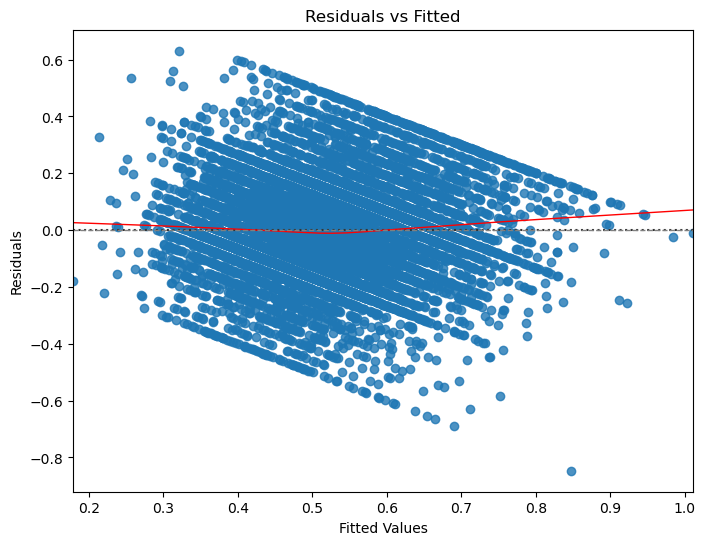

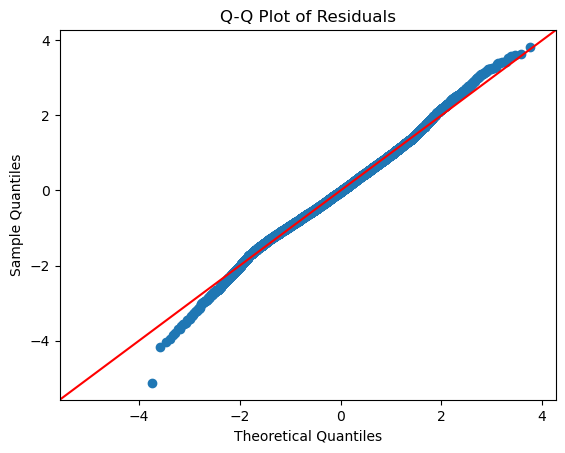

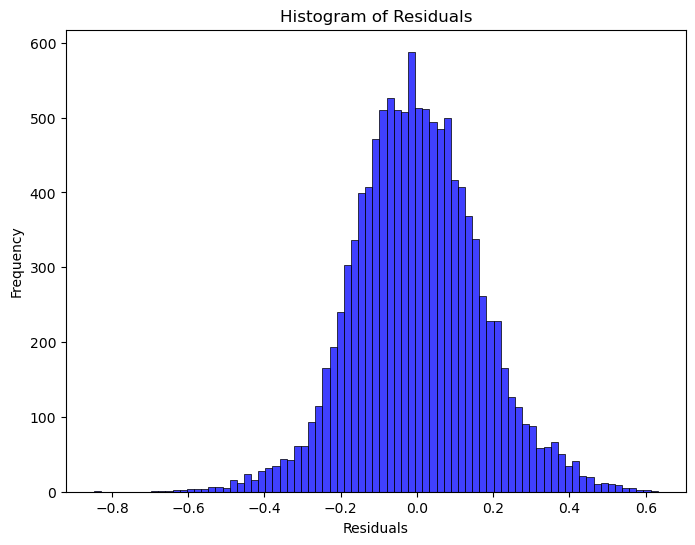

In [38]:
plots(ols_model_robust)

# DUMMY WPFI COUNTRY TEST

In [39]:
df = pd.read_csv('data/wvs/wave7.csv')

# Define the list of countries to include
countries_to_keep = ['AUS','CAN','DEU','NLD','USA']
# Filter the DataFrame
df = df[df['B_COUNTRY_ALPHA'].isin(countries_to_keep)].copy()

dummies = pd.get_dummies(df['B_COUNTRY_ALPHA'], prefix='country').astype(int)
df = pd.concat([df, dummies], axis=1)
df = df.drop(['country_DEU'], axis=1)

C:\Users\ekaba\AppData\Local\Temp\ipykernel_23328\1747683900.py:1: DtypeWarning: Columns (582,583,584) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/wvs/wave7.csv')


In [40]:
df['wpfi_AUS'] = df['wpfi_rank']*df['country_AUS']
df['wpfi_CAN'] = df['wpfi_rank']*df['country_CAN']
df['wpfi_NLD'] = df['wpfi_rank']*df['country_NLD']
df['wpfi_USA'] = df['wpfi_rank']*df['country_USA']

interactions = ['wpfi_AUS', 'wpfi_CAN', 'wpfi_NLD', 'wpfi_USA']

## Baseline

In [41]:
X = df.loc[:, 'baseline_corruption':'income_group']
#X['wpfi_rank'] = df['wpfi_rank']
X[interactions] = df[interactions]
y = df['base_distrust_index']

In [42]:
# Add a constant term to the model (for the intercept)
X_const = sm.add_constant(X)

# Fit OLS model with robust standard errors
ols_model_robust = sm.OLS(y, X_const).fit(cov_type='HC0')

# Print the regression results with robust standard errors
print(ols_model_robust.summary())

                             OLS Regression Results                            
Dep. Variable:     base_distrust_index   R-squared:                       0.309
Model:                             OLS   Adj. R-squared:                  0.307
Method:                  Least Squares   F-statistic:                     117.1
Date:                 Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                         12:50:19   Log-Likelihood:                 7964.1
No. Observations:                11512   AIC:                        -1.585e+04
Df Residuals:                    11473   BIC:                        -1.556e+04
Df Model:                           38                                         
Covariance Type:                   HC0                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

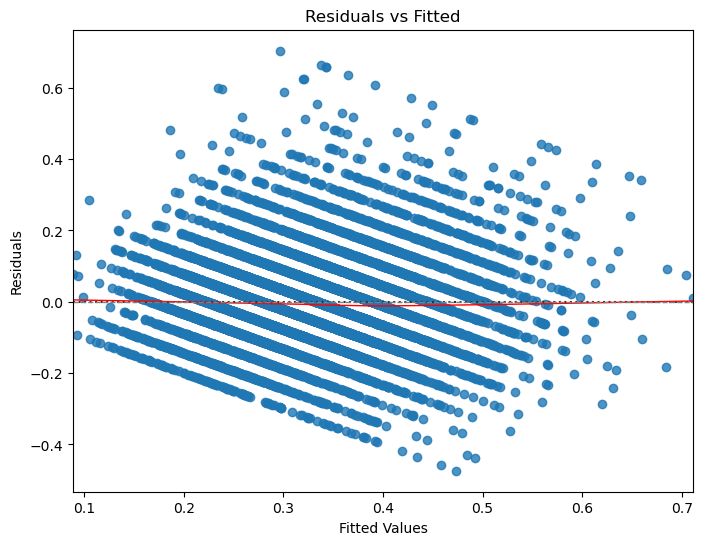

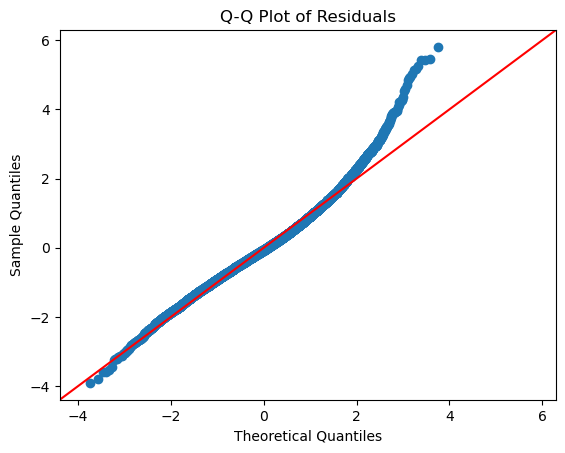

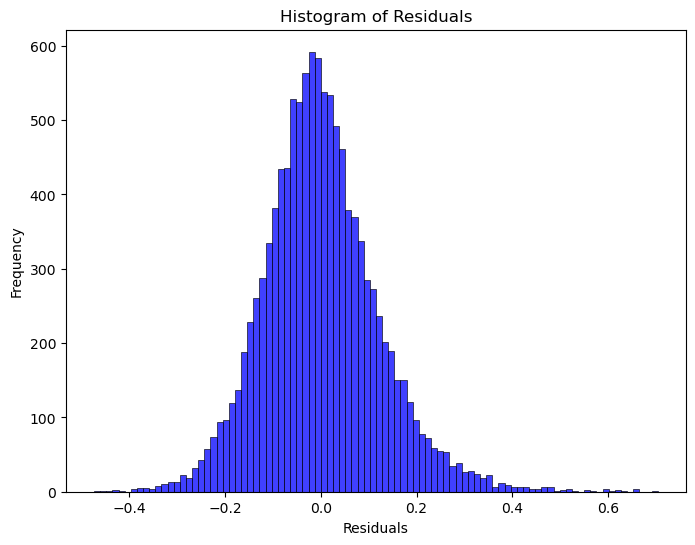

In [43]:
plots(ols_model_robust)